In [1]:
import pandas as pd
df_all = pd.read_csv('dados_estacao_detalhada_86510000_consolidado_ALL.csv')
#df_all

C:\Users\fabri\AppData\Local\Temp\ipykernel_6284\2735326944.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('dados_estacao_detalhada_86510000_consolidado_ALL.csv')


In [2]:
df = df_all

# Converter a coluna 'Data_Hora_Medicao' para datetime (se necessário)
df['Data_Hora_Medicao'] = pd.to_datetime(df['Data_Hora_Medicao'], errors='coerce')

# Verificar a diferença de tempo entre as medições
df['diff_time'] = df['Data_Hora_Medicao'].diff()

# Identificar medições com intervalo de 1 hora e 15 minutos
df_15min = df[df['diff_time'] == pd.Timedelta(minutes=15)]
df_1hora = df[df['diff_time'] == pd.Timedelta(hours=1)]

# Exibir a quantidade de registros para cada grupo
print("Total de registros com intervalo de 15 minutos:", len(df_15min))
print("Total de registros com intervalo de 1 hora:", len(df_1hora))

# Interpolação para dados com intervalo de 1 hora
# Caso queira preencher os dados de 1 hora para uma granularidade de 15 minutos
#df_interpolado = df_1hora.resample('15T', on='Data_Hora_Medicao').interpolate(method='linear')

# Filtrar dados com intervalos irregulares (outliers temporais)
intervalos_irregulares = df[~df['diff_time'].isin([pd.Timedelta(minutes=15), pd.Timedelta(hours=1)])]
print("Registros com intervalos irregulares:", len(intervalos_irregulares))

# Remover os registros com intervalos irregulares, se necessário
#df_limpo = df.drop(intervalos_irregulares.index)

# Verificar se a remoção dos intervalos irregulares está correta
print("Total de registros :", len(df_all))

# Exibir o DataFrame processado
df_all


Total de registros com intervalo de 15 minutos: 202053
Total de registros com intervalo de 1 hora: 4047
Registros com intervalos irregulares: 110
Total de registros : 206210


,Data_Hora_Medicao,Bateria,Chuva_Acumulada,Chuva_Acumulada_Status,Chuva_Adotada,Chuva_Adotada_Status,Cota_Adotada,Cota_Adotada_Status,Cota_Display,Cota_Display_Status,...,Data_Atualizacao,Pressao_Atmosferica,Pressao_Atmosferica_Status,Temperatura_Agua,Temperatura_Agua_Status,Temperatura_Interna,Vazao_Adotada,Vazao_Adotada_Status,codigoestacao,diff_time
0,2018-04-30 00:00:00,11.81,134.0,4.0,NaN,NaN,106.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.2,NaN,NaN,86510000,NaT
1,2018-04-30 01:00:00,11.79,134.0,0.0,0.0,0.0,105.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.7,55.50,0.0,86510000,0 days 01:00:00
2,2018-04-30 02:00:00,11.77,134.0,0.0,0.0,0.0,103.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.4,53.40,0.0,86510000,0 days 01:00:00
3,2018-04-30 03:00:00,11.75,134.0,0.0,0.0,0.0,101.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.5,51.40,0.0,86510000,0 days 01:00:00
4,2018-04-30 04:00:00,11.73,134.0,0.0,0.0,0.0,100.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.7,50.40,0.0,86510000,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,2024-08-31 23:00:00,12.90,1955.6,0.0,0.0,0.0,190.0,0.0,NaN,NaN,...,2024-08-31 23:50:32.323,NaN,NaN,NaN,NaN,20.4,180.47,0.0,86510000,0 days 00:15:00
206206,2024-08-31 23:15:00,12.90,1955.6,0.0,0.0,0.0,188.0,0.0,NaN,NaN,...,2024-08-31 23:50:32.33,NaN,NaN,NaN,NaN,20.4,176.40,0.0,86510000,0 days 00:15:00
206207,2024-08-31 23:30:00,12.90,1955.6,0.0,0.0,0.0,187.0,0.0,NaN,NaN,...,2024-08-31 23:50:32.33,NaN,NaN,NaN,NaN,20.4,174.38,0.0,86510000,0 days 00:15:00
206208,2024-08-31 23:45:00,12.90,1955.6,0.0,0.0,0.0,189.0,0.0,NaN,NaN,...,2024-08-31 23:50:32.33,NaN,NaN,NaN,NaN,20.4,178.43,0.0,86510000,0 days 00:15:00


Resumo estatístico:
        Cota_Adotada  Vazao_Adotada
count  203035.000000  203035.000000
mean      244.817119     435.920174
std       216.524613     876.896711
min        39.000000       5.500000
25%       118.000000      69.000000
50%       187.000000     175.900000
75%       295.000000     445.800000
max      2557.000000   13241.500000


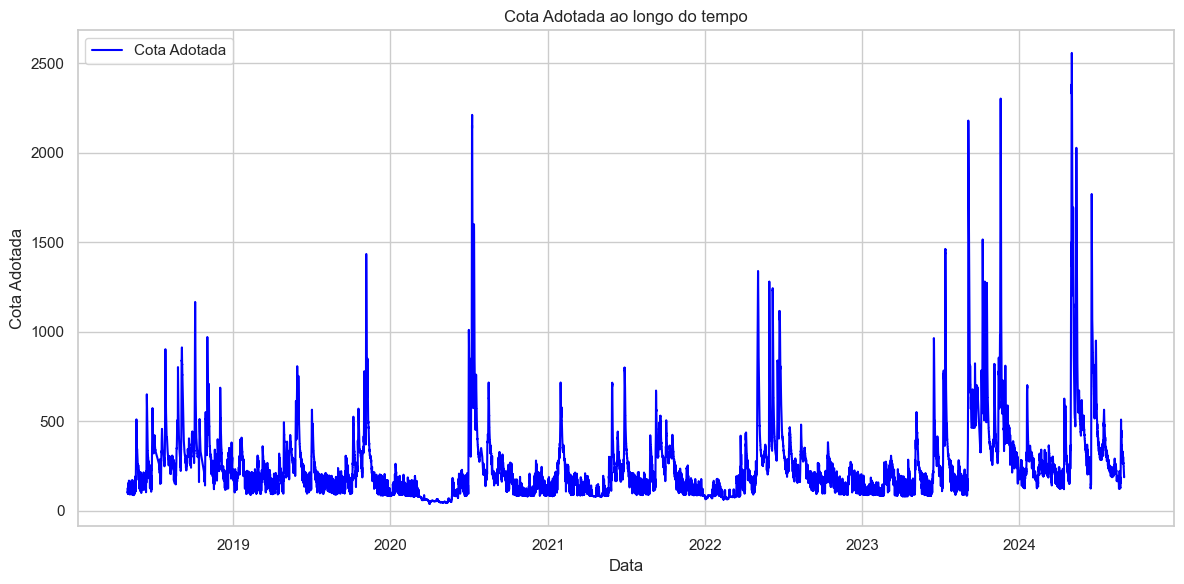

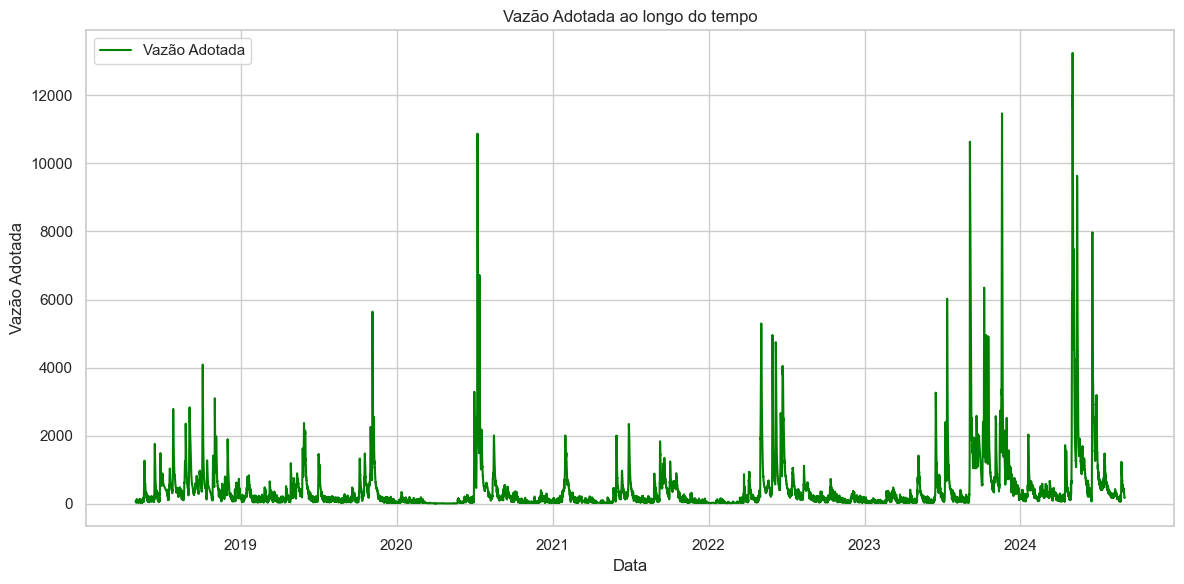

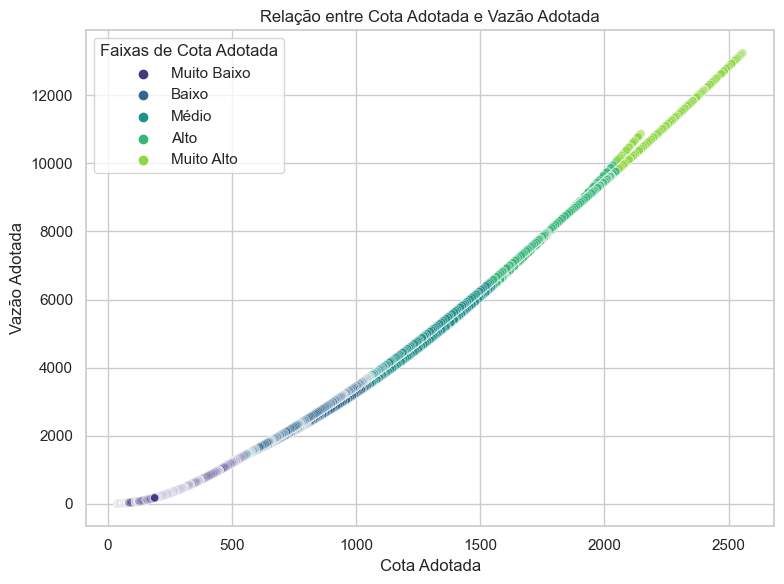

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Verificar se 'Data_Hora_Medicao' está nas colunas e converter para datetime
if 'Data_Hora_Medicao' in df_all.columns:
    df_all['Data_Hora_Medicao'] = pd.to_datetime(df_all['Data_Hora_Medicao'], errors='coerce')
    # Definir 'Data_Hora_Medicao' como índice
    df_all.set_index('Data_Hora_Medicao', inplace=True)
else:
    # Se já for o índice, garantir que seja do tipo datetime
    df_all.index = pd.to_datetime(df_all.index, errors='coerce')

# Remover linhas com índices inválidos
df_all = df_all[~df_all.index.isna()]

# Ordenar o DataFrame por data
df_all.sort_index(inplace=True)

# Remover valores ausentes nas colunas de interesse
df_estacao = df_all[['Cota_Adotada', 'Vazao_Adotada']].dropna()
#df_estacao = df_all

# Verificar se há dados suficientes para análise
if df_estacao.empty:
    print("Não há dados suficientes para análise após remover valores ausentes.")
else:
    # Calcular estatísticas descritivas
    resumo = df_estacao.describe()
    print("Resumo estatístico:")
    print(resumo)

    # Plotar gráfico da Cota Adotada ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(df_estacao.index, df_estacao['Cota_Adotada'], label='Cota Adotada', color='blue')
    plt.title('Cota Adotada ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel('Cota Adotada')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotar gráfico da Vazão Adotada ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(df_estacao.index, df_estacao['Vazao_Adotada'], label='Vazão Adotada', color='green')
    plt.title('Vazão Adotada ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel('Vazão Adotada')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Agora o gráfico de dispersão com base nas faixas de valores de Cota_Adotada
    plt.figure(figsize=(8, 6))

    # Categorizar a Cota_Adotada em bins para atribuir cores diferentes
    bins = pd.cut(df_estacao['Cota_Adotada'], bins=5, labels=["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"])
    
    scatter = sns.scatterplot(x='Cota_Adotada', y='Vazao_Adotada', hue=bins, data=df_estacao, palette='viridis', alpha=0.6)

    plt.title('Relação entre Cota Adotada e Vazão Adotada')
    plt.xlabel('Cota Adotada')
    plt.ylabel('Vazão Adotada')
    plt.legend(title='Faixas de Cota Adotada')
    plt.tight_layout()
    plt.show()
